In [1]:
import re

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

In [2]:
sns.set_style("ticks")

# Repositories Analysis

This notebook contains analysis of popular GitHub repositories.

The analysis is based on lists of top 5000 repositories by the number of stars and top 5000 repositories by the number of forks.
The data were obtained on 2024-07-14 using scripts in the repository.

## Preparation

We start by loading a list of top 5000 repositories by stars and a list of top 5000 repositories by forks.

In [3]:
repositories_by_stars = pd.read_json("../data/repositories-by-stars.json")
repositories_by_stars.set_index("id", inplace=True)

In [4]:
repositories_by_stars.sort_values(by="stargazers_count", ascending=False)

owner                         name  \
id                                                        
28457823      freeCodeCamp                 freeCodeCamp   
13491895   EbookFoundation       free-programming-books   
21737465      sindresorhus                      awesome   
54346799       public-apis                  public-apis   
60493101           jwasham  coding-interview-university   
...                    ...                          ...   
6098927       robertkrimen                         otto   
3087541          patrickmn                     go-cache   
558443197     OdysseusYuan              LKY_OfficeTools   
3693021          mailcheck                    mailcheck   
4445324          zsh-users                      antigen   

                                                         url    size  \
id                                                                     
28457823        https://github.com/freeCodeCamp/freeCodeCamp  449544   
13491895   https://github.com/EbookFoundation/free-progra...   18628   
21737465             https://github.com/sindresorhus/awesome    1517   
54346799          https://github.com/public-apis/public-apis    5010   
60493101   https://github.com/jwasham/coding-interview-un...   22281   
...                                                      ...     ...   
6098927                 https://github.com/robertkrimen/otto    2263   
3087541                https://github.com/patrickmn/go-cache     126   
558443197    https://github.com/OdysseusYuan/LKY_OfficeTools   49445   
3693021               https://github.com/mailcheck/mailcheck     405   
4445324                 https://github.com/zsh-users/antigen    1819   

          default_branch       license    language  \
id                                                   
28457823            main  BSD-3-Clause  TypeScript   
13491895            main     CC-BY-4.0        None   
21737465            main       CC0-1.0        None   
54346799          master           MIT      Python   
60493101            main  CC-BY-SA-4.0        None   
...                  ...           ...         ...   
6098927           master           MIT          Go   
3087541           master           MIT          Go   
558443197         master       GPL-3.0          C#   
3693021           master           MIT  JavaScript   
4445324          develop           MIT       Shell   

                                                   languages  \
id                                                             
28457823   {'TypeScript': 2268093, 'JavaScript': 954807, ...   
13491895                                                  {}   
21737465                                                  {}   
54346799                    {'Python': 40479, 'Shell': 1352}   
60493101                                                  {}   
...                                                      ...   
6098927                        {'Go': 1006774, 'Perl': 1604}   
3087541                                        {'Go': 76573}   
558443197                                     {'C#': 236846}   
3693021    {'JavaScript': 116643, 'CSS': 6444, 'CoffeeScr...   
4445324    {'Shell': 128635, 'Perl': 30688, 'Makefile': 9...   

                                                 description  \
id                                                             
28457823   freeCodeCamp.org's open-source codebase and cu...   
13491895          :books: Freely available programming books   
21737465   😎 Awesome lists about all kinds of interesting...   
54346799                      A collective list of free APIs   
60493101   A complete computer science study plan to beco...   
...                                                      ...   
6098927              A JavaScript interpreter in Go (golang)   
3087541    An in-memory key:value store/cache (similar to...   
558443197                         一键自动化 下载、安装、激活 Office 的利器。   
3693021    Reduce misspelled email addresses in your web ...   
4445324     

In [5]:
repositories_by_forks = pd.read_json("../data/repositories-by-forks.json")
repositories_by_forks.set_index("id", inplace=True)

In [6]:
repositories_by_forks.sort_values(by="forks_count", ascending=False)

owner  \
id                                      
14204342                       jtleek   
1300192                       octocat   
15917132                       rdpeng   
40212802         SmartThingsCommunity   
121291758                Pierian-Data   
...                               ...   
111194705                      nestjs   
326713486                  css-for-js   
63705439            learn-co-students   
114429041  bloominstituteoftechnology   
557693172                     c4fiber   

                                              name  \
id                                                   
14204342                               datasharing   
1300192                                Spoon-Knife   
15917132                    ProgrammingAssignment2   
40212802                         SmartThingsPublic   
121291758               Complete-Python-3-Bootcamp   
...                                            ...   
111194705                          docs.nestjs.com   
326713486                        character-creator   
63705439    javascript-arithmetic-lab-js-intro-000   
114429041  Sprint-Challenge--Computer-Architecture   
557693172                          java-onboarding   

                                                         url   size  \
id                                                                    
14204342               https://github.com/jtleek/datasharing    590   
1300192               https://github.com/octocat/Spoon-Knife      2   
15917132    https://github.com/rdpeng/ProgrammingAssignment2   6670   
40212802   https://github.com/SmartThingsCommunity/SmartT...  21066   
121291758  https://github.com/Pierian-Data/Complete-Pytho...  37125   
...                                                      ...    ...   
111194705          https://github.com/nestjs/docs.nestjs.com  55344   
326713486    https://github.com/css-for-js/character-creator   4733   
63705439   https://github.com/learn-co-students/javascrip...     22   
114429041  https://github.com/bloominstituteoftechnology/...     16   
557693172         https://github.com/c4fiber/java-onboarding     81   

          default_branch      license          language  \
id                                                        
14204342          master         None              None   
1300192             main         None              HTML   
15917132          master         None                 R   
40212802          master         None            Groovy   
121291758         master         None  Jupyter Notebook   
...                  ...          ...               ...   
111194705         master          MIT        TypeScript   
326713486           main  NOASSERTION        JavaScript   
63705439          master  NOASSERTION        JavaScript   
114429041         master         None          Assembly   
557693172           main         None              None   

                                                   languages  \
id                                                             
14204342                                                  {}   
1300192                            {'HTML': 355, 'CSS': 256}   
15917132                                          {'R': 324}   
40212802                   {'Groovy': 5372198, 'Shell': 655}   
121291758     {'Jupyter Notebook': 35097216, 'Python': 1767}   
...                                                      ...   
111194705  {'TypeScript': 154284, 'SCSS': 43993, 'JavaScr...   
326713486    {'JavaScript': 10249, 'CSS': 2415, 'HTML': 716}   
63705439                   {'JavaScript': 2509, 'HTML': 786}   
114429041                                  {'Assembly': 686}   
557693172                                     {'Java': 5318}   

                                                 description  \
id                                                             
14204342               The Leek group guide to data sharing    
1300192        This repo is for demonstration purposes only.   
15917132   Rep

We merge the two lists to get a list of popular repositories by either of these two metrics.

In [7]:
df = pd.concat([repositories_by_stars, repositories_by_forks])
df = df.groupby(df.index).first()

In [8]:
df

owner                  name  \
id                                                 
3282             preservim              nerdtree   
3314                 spree                 spree   
8393            thoughtbot             paperclip   
8514                 rails                 rails   
15435              Shopify                liquid   
...                    ...                   ...   
808045485  LadybirdBrowser              ladybird   
812323913      tech-shrimp   docker_image_pusher   
813254316            cmliu  CF-Workers-docker.io   
815467392      wukongdaily      DockerTarBuilder   
825726640      ShiArthur03           ShiArthur03   

                                                         url    size  \
id                                                                     
3282                   https://github.com/preservim/nerdtree    1995   
3314                          https://github.com/spree/spree  155135   
8393                 https://github.com/thoughtbot/paperclip    3579   
8514                          https://github.com/rails/rails  280094   
15435                      https://github.com/Shopify/liquid    5705   
...                                                      ...     ...   
808045485        https://github.com/LadybirdBrowser/ladybird  226351   
812323913  https://github.com/tech-shrimp/docker_image_pu...     734   
813254316      https://github.com/cmliu/CF-Workers-docker.io      25   
815467392    https://github.com/wukongdaily/DockerTarBuilder      54   
825726640         https://github.com/ShiArthur03/ShiArthur03  257015   

          default_branch       license    language  \
id                                                   
3282              master         WTFPL  Vim Script   
3314                main  BSD-3-Clause        Ruby   
8393                main   NOASSERTION        Ruby   
8514                main           MIT        Ruby   
15435               main           MIT        Ruby   
...                  ...           ...         ...   
808045485         master  BSD-2-Clause         C++   
812323913           main    Apache-2.0        None   
813254316           main          None  JavaScript   
815467392         master       GPL-3.0        None   
825726640           main       GPL-3.0      MATLAB   

                                                   languages  \
id                                                             
3282                                  {'Vim Script': 217175}   
3314       {'Ruby': 3046097, 'HTML': 26893, 'Shell': 4764...   
8393          {'Ruby': 522650, 'Gherkin': 8317, 'HTML': 407}   
8514       {'Ruby': 16757609, 'JavaScript': 216319, 'HTML...   
15435                      {'Ruby': 467586, 'Liquid': 72882}   
...                                                      ...   
808045485  {'C++': 24568535, 'JavaScript': 2309458, 'HTML...   
812323913                                                 {}   
813254316                               {'JavaScript': 9865}   
815467392                                                 {}   
825726640                                  {'MATLAB': 65005}   

                                                 description  \
id                                                             
3282                         A tree explorer plugin for vim.   
3314       An open source eCommerce platform giving you f...   
8393        Easy file attachment management for ActiveRecord   
8514                                           Ruby on Rails   
15435      Liquid markup language. Safe, customer facing ...   
...                                                      ...   
808045485                      Truly independent web browser   
812323913  使用Github Action将国外的Docker镜像转存到阿里云私有仓库，供国内服务器使用...   
813254316  这个项目是一个基于 Cloudflare Workers 的 Docker 镜像代理工具。它...   
815467392                      它是一个工作流。可快速构建指定架构/平台的docker镜像   
825726640                                               None   

                                      

In [9]:
# Repositories that are both in top 5000 by stars and by forks
df[df.index.isin(repositories_by_stars.index) & df.index.isin(repositories_by_forks.index)]

owner         name  \
id                                       
3314                spree        spree   
8514                rails        rails   
26554      reddit-archive       reddit   
34096            leachim6  hello-world   
36502                 git          git   
...                   ...          ...   
773286980         xai-org       grok-1   
774650660   hydralauncher        hydra   
775250190       stitionai       devika   
806709826          2noise      ChatTTS   
825726640     ShiArthur03  ShiArthur03   

                                                  url    size default_branch  \
id                                                                             
3314                   https://github.com/spree/spree  155135           main   
8514                   https://github.com/rails/rails  280094           main   
26554        https://github.com/reddit-archive/reddit   40093         master   
34096         https://github.com/leachim6/hello-world    5294           main   
36502                      https://github.com/git/git  252733         master   
...                                               ...     ...            ...   
773286980           https://github.com/xai-org/grok-1    1008           main   
774650660      https://github.com/hydralauncher/hydra   38424           main   
775250190         https://github.com/stitionai/devika    6132           main   
806709826           https://github.com/2noise/ChatTTS    7882           main   
825726640  https://github.com/ShiArthur03/ShiArthur03  257015           main   

                license    language  \
id                                    
3314       BSD-3-Clause        Ruby   
8514                MIT        Ruby   
26554       NOASSERTION      Python   
34096               MIT    Assembly   
36502       NOASSERTION           C   
...                 ...         ...   
773286980    Apache-2.0      Python   
774650660           MIT  TypeScript   
775250190           MIT      Python   
806709826   NOASSERTION      Python   
825726640       GPL-3.0      MATLAB   

                                                   languages  \
id                                                             
3314       {'Ruby': 3046097, 'HTML': 26893, 'Shell': 4764...   
8514       {'Ruby': 16757609, 'JavaScript': 216319, 'HTML...   
26554      {'Python': 3814709, 'JavaScript': 1878352, 'HT...   
34096      {'Assembly': 21160, 'Python': 5039, 'C': 2355,...   
36502      {'C': 11058749, 'Shell': 8473599, 'Perl': 1161...   
...                                                      ...   
773286980                                  {'Python': 77280}   
774650660  {'TypeScript': 354745, 'Python': 5812, 'JavaSc...   
775250190  {'Python': 125021, 'Svelte': 48724, 'Jinja': 1...   
806709826        {'Python': 99445, 'Go': 1310, 'Shell': 261}   
825726640                                  {'MATLAB': 65005}   

                                                 description  \
id                                                             
3314       An open source eCommerce platform giving you f...   
8514                                           Ruby on Rails   
26554                        historical code from reddit.com   
34096      Hello world in every computer language.  Thank...   
36502      Git Source Code Mirror - This is a publish-onl...   
...                                                      ...   
773286980                                  Grok open release   
774650660  Hydra is a game launcher with its own embedded...   
775250190  Devika is an Agentic AI Software Engineer that...   
806709826      A generative speech model for daily dialogue.   
825726640                                               None   

                                               homepage  ...  \
id                                                       ...   
3314                          https://spreecommerce.org  ...   
8514                            https://rubyonrails.org  ...   
26

In [10]:
# Repositories that are only in top 5000 by stars
df[df.index.isin(repositories_by_stars.index) & ~df.index.isin(repositories_by_forks.index)].sort_values(by="stargazers_count", ascending=False)

owner               name  \
id                                           
196701619    tauri-apps              tauri   
1334369          resume  resume.github.com   
163883279        nektos                act   
130464961       sharkdp                bat   
138547797   FiloSottile             mkcert   
...                 ...                ...   
6098927    robertkrimen               otto   
3087541       patrickmn           go-cache   
558443197  OdysseusYuan    LKY_OfficeTools   
3693021       mailcheck          mailcheck   
4445324       zsh-users            antigen   

                                                       url   size  \
id                                                                  
196701619              https://github.com/tauri-apps/tauri  85503   
1334369        https://github.com/resume/resume.github.com    411   
163883279                    https://github.com/nektos/act   9966   
130464961                   https://github.com/sharkdp/bat  31141   
138547797            https://github.com/FiloSottile/mkcert   1799   
...                                                    ...    ...   
6098927               https://github.com/robertkrimen/otto   2263   
3087541              https://github.com/patrickmn/go-cache    126   
558443197  https://github.com/OdysseusYuan/LKY_OfficeTools  49445   
3693021             https://github.com/mailcheck/mailcheck    405   
4445324               https://github.com/zsh-users/antigen   1819   

          default_branch       license    language  \
id                                                   
196701619            dev    Apache-2.0        Rust   
1334369           master          None  JavaScript   
163883279         master           MIT          Go   
130464961         master    Apache-2.0        Rust   
138547797         master  BSD-3-Clause          Go   
...                  ...           ...         ...   
6098927           master           MIT          Go   
3087541           master           MIT          Go   
558443197         master       GPL-3.0          C#   
3693021           master           MIT  JavaScript   
4445324          develop           MIT       Shell   

                                                   languages  \
id                                                             
196701619  {'Rust': 2158943, 'TypeScript': 188102, 'NSIS'...   
1334369    {'JavaScript': 19277, 'HTML': 15229, 'CSS': 73...   
163883279  {'Go': 735944, 'JavaScript': 168741, 'Shell': ...   
130464961  {'Rust': 407186, 'Python': 8968, 'Shell': 3653...   
138547797                                      {'Go': 41331}   
...                                                      ...   
6098927                        {'Go': 1006774, 'Perl': 1604}   
3087541                                        {'Go': 76573}   
558443197                                     {'C#': 236846}   
3693021    {'JavaScript': 116643, 'CSS': 6444, 'CoffeeScr...   
4445324    {'Shell': 128635, 'Perl': 30688, 'Makefile': 9...   

                                                 description  \
id                                                             
196701619  Build smaller, faster, and more secure desktop...   
1334369      Resumes generated using the GitHub informations   
163883279                  Run your GitHub Actions locally 🚀   
130464961                         A cat(1) clone with wings.   
138547797  A simple zero-config tool to make locally trus...   
...                                                      ...   
6098927              A JavaScript interpreter in Go (golang)   
3087541    An in-memory key:value store/cache (similar to...   
558443197                         一键自动化 下载、安装、激活 Office 的利器。   
3693021    Reduce misspelled email addresses in your web ...   
4445324                          The plugin manager for zsh.   

                                                homepage  ...  \
id                                                        ...   
196701619             

In [11]:
# Repositories that are only in top 5000 by forks
df[~df.index.isin(repositories_by_stars.index) & df.index.isin(repositories_by_forks.index)].sort_values(by="forks_count", ascending=False)

owner  \
id                                      
14204342                       jtleek   
15917132                       rdpeng   
40212802         SmartThingsCommunity   
20042152                   nightscout   
397384430              TheOdinProject   
...                               ...   
5291075                     samdutton   
326713486                  css-for-js   
63705439            learn-co-students   
114429041  bloominstituteoftechnology   
557693172                     c4fiber   

                                              name  \
id                                                   
14204342                               datasharing   
15917132                    ProgrammingAssignment2   
40212802                         SmartThingsPublic   
20042152                        cgm-remote-monitor   
397384430                            css-exercises   
...                                            ...   
5291075                                      simpl   
326713486                        character-creator   
63705439    javascript-arithmetic-lab-js-intro-000   
114429041  Sprint-Challenge--Computer-Architecture   
557693172                          java-onboarding   

                                                         url    size  \
id                                                                     
14204342               https://github.com/jtleek/datasharing     590   
15917132    https://github.com/rdpeng/ProgrammingAssignment2    6670   
40212802   https://github.com/SmartThingsCommunity/SmartT...   21066   
20042152    https://github.com/nightscout/cgm-remote-monitor   30180   
397384430    https://github.com/TheOdinProject/css-exercises    6989   
...                                                      ...     ...   
5291075                   https://github.com/samdutton/simpl  535434   
326713486    https://github.com/css-for-js/character-creator    4733   
63705439   https://github.com/learn-co-students/javascrip...      22   
114429041  https://github.com/bloominstituteoftechnology/...      16   
557693172         https://github.com/c4fiber/java-onboarding      81   

          default_branch      license    language  \
id                                                  
14204342          master         None        None   
15917132          master         None           R   
40212802          master         None      Groovy   
20042152          master     AGPL-3.0  JavaScript   
397384430           main          MIT        HTML   
...                  ...          ...         ...   
5291075         gh-pages   Apache-2.0        HTML   
326713486           main  NOASSERTION  JavaScript   
63705439          master  NOASSERTION  JavaScript   
114429041         master         None    Assembly   
557693172           main         None        None   

                                                   languages  \
id                                                             
14204342                                                  {}   
15917132                                          {'R': 324}   
40212802                   {'Groovy': 5372198, 'Shell': 655}   
20042152   {'JavaScript': 1548414, 'CSS': 153590, 'HTML':...   
397384430  {'HTML': 46233, 'CSS': 26050, 'JavaScript': 2297}   
...                                                      ...   
5291075    {'HTML': 27494917, 'JavaScript': 1134849, 'CSS...   
326713486    {'JavaScript': 10249, 'CSS': 2415, 'HTML': 716}   
63705439                   {'JavaScript': 2509, 'HTML': 786}   
114429041                                  {'Assembly': 686}   
557693172                                     {'Java': 5318}   

                                                 description  \
id                                                             
14204342               The Leek group guide to data sharing    
15917132   Repository for Programming Assignment 2 for R ...   
40212802   SmartThings open-source DeviceType Handlers an...   
20042152       

It can be seen that the two lists partially overlap, that is, there are repositories that are both in the top 5000 by stars and by forks.
However, there exist more repositories that are present only in one of those lists.

## Common Popularity Metrics

There are three main metrics that are commonly used to measure the repository popularity:

* **Stars:** Stars are like bookmarks or votes of appreciation from users. They measure the repository's appeal to the community.
* **Forks:** Forks allow users to make personal copies of a repository. The number of forks shows the interest in contributing to the project.
* **Watchers:** Watchers are users who receive notifications about updates in a repository. Their number shows the level of ongoing interest in the project.

For a start, we can analyze the distribution of each of these metrics.

### Stars Distribution

In [12]:
df["stargazers_count"].describe()

count      7424.000000
mean      13933.798222
std       19499.957557
min           0.000000
25%        4893.250000
50%        9924.500000
75%       16244.500000
max      393863.000000
Name: stargazers_count, dtype: float64

<Axes: xlabel='Number of stars', ylabel='Frequency (log)'>

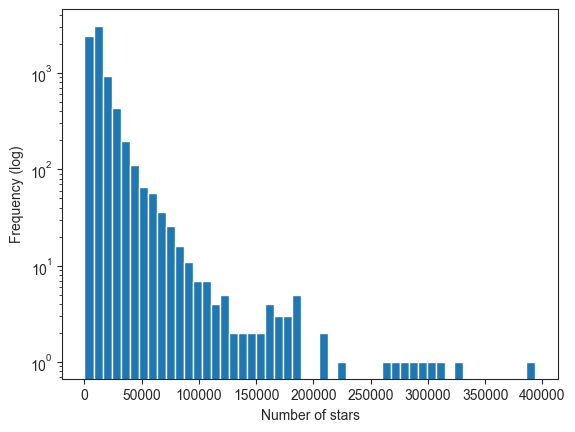

In [13]:
df["stargazers_count"].plot.hist(bins=50, logy=True, xlabel="Number of stars", ylabel="Frequency (log)")

In [14]:
display(df[df["stargazers_count"] > 10_000].shape[0])
display(df[df["stargazers_count"] > 50_000].shape[0])
display(df[df["stargazers_count"] > 100_000].shape[0])

3675

240

53

In [15]:
df.sort_values(by="stargazers_count", ascending=False).head()

owner                         name  \
id                                                       
28457823     freeCodeCamp                 freeCodeCamp   
13491895  EbookFoundation       free-programming-books   
21737465     sindresorhus                      awesome   
54346799      public-apis                  public-apis   
60493101          jwasham  coding-interview-university   

                                                        url    size  \
id                                                                    
28457823       https://github.com/freeCodeCamp/freeCodeCamp  449544   
13491895  https://github.com/EbookFoundation/free-progra...   18628   
21737465            https://github.com/sindresorhus/awesome    1517   
54346799         https://github.com/public-apis/public-apis    5010   
60493101  https://github.com/jwasham/coding-interview-un...   22281   

         default_branch       license    language  \
id                                                  
28457823           main  BSD-3-Clause  TypeScript   
13491895           main     CC-BY-4.0        None   
21737465           main       CC0-1.0        None   
54346799         master           MIT      Python   
60493101           main  CC-BY-SA-4.0        None   

                                                  languages  \
id                                                            
28457823  {'TypeScript': 2268093, 'JavaScript': 954807, ...   
13491895                                                 {}   
21737465                                                 {}   
54346799                   {'Python': 40479, 'Shell': 1352}   
60493101                                                 {}   

                                                description  \
id                                                            
28457823  freeCodeCamp.org's open-source codebase and cu...   
13491895         :books: Freely available programming books   
21737465  😎 Awesome lists about all kinds of interesting...   
54346799                     A collective list of free APIs   
60493101  A complete computer science study plan to beco...   

                                                   homepage  ...  \
id                                                           ...   
28457823           http://contribute.freecodecamp.org/intro  ...   
13491895  https://ebookfoundation.github.io/free-program...  ...   
21737465                                               None  ...   
54346799  https://APILayer.com/?utm_source=Github&utm_me...  ...   
60493101                                               None  ...   

         open_issues_count has_issues has_discussions has_wiki  has_pages  \
id                                                                          
28457823               236       True           False    False      False   
13491895                35       True           False    False       True   
21737465                38       True           False    False       True   
54346799               289       True           False    False      False   
60493101                44       True           False    False      False   

          has_projects  has_downloads  is_fork  is_template  is_archived  
id                                                                        
28457823          True           True    False        False        False  
13491895         False           True    False        False        False  
21737465         False           True    False        False        False  
54346799         False           True    False        False        False  
60493101         False           True    False        False        False  

[5 rows x 27 columns]

We see that slightly more than a half of all repositories in a list have less than 10.000 stars, while the remaining repositories range from around 10.000 to almost 400.000 stars.
Only around 50 repositories have more than 100.000 stars.
The most popular repository is `freeCodeCamp/freeCodeCamp` with over 390.000 stars, which leads the second repository by over 65.000 stars.

### Forks Distribution

In [16]:
df["forks_count"].describe()

count      7424.000000
mean       3420.494073
std        6276.489792
min          19.000000
25%        1323.750000
50%        2105.500000
75%        3489.250000
max      243459.000000
Name: forks_count, dtype: float64

<Axes: xlabel='Number of forks', ylabel='Frequency (log)'>

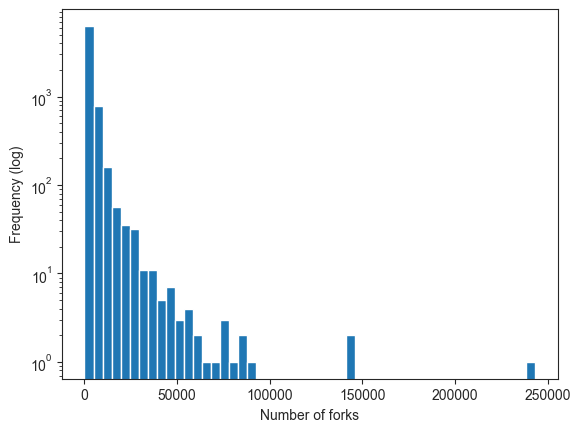

In [17]:
df["forks_count"].plot.hist(bins=50, logy=True, xlabel="Number of forks", ylabel="Frequency (log)")

In [18]:
display(df[df["forks_count"] > 10_000].shape[0])
display(df[df["forks_count"] > 50_000].shape[0])
display(df[df["forks_count"] > 100_000].shape[0])

319

21

3

In [19]:
df.sort_values(by="forks_count", ascending=False).head()

owner                        name  \
id                                                            
14204342                 jtleek                 datasharing   
1300192                 octocat                 Spoon-Knife   
15917132                 rdpeng      ProgrammingAssignment2   
40212802   SmartThingsCommunity           SmartThingsPublic   
121291758          Pierian-Data  Complete-Python-3-Bootcamp   

                                                         url   size  \
id                                                                    
14204342               https://github.com/jtleek/datasharing    590   
1300192               https://github.com/octocat/Spoon-Knife      2   
15917132    https://github.com/rdpeng/ProgrammingAssignment2   6670   
40212802   https://github.com/SmartThingsCommunity/SmartT...  21066   
121291758  https://github.com/Pierian-Data/Complete-Pytho...  37125   

          default_branch license          language  \
id                                                   
14204342          master    None              None   
1300192             main    None              HTML   
15917132          master    None                 R   
40212802          master    None            Groovy   
121291758         master    None  Jupyter Notebook   

                                                languages  \
id                                                          
14204342                                               {}   
1300192                         {'HTML': 355, 'CSS': 256}   
15917132                                       {'R': 324}   
40212802                {'Groovy': 5372198, 'Shell': 655}   
121291758  {'Jupyter Notebook': 35097216, 'Python': 1767}   

                                                 description  \
id                                                             
14204342               The Leek group guide to data sharing    
1300192        This repo is for demonstration purposes only.   
15917132   Repository for Programming Assignment 2 for R ...   
40212802   SmartThings open-source DeviceType Handlers an...   
121291758  Course Files for Complete Python 3 Bootcamp Co...   

                                                    homepage  ...  \
id                                                            ...   
14204342                                                None  ...   
1300192                                                 None  ...   
15917132                                                None  ...   
40212802   https://developer-preview.smartthings.com/docs...  ...   
121291758                                               None  ...   

          open_issues_count has_issues has_discussions has_wiki  has_pages  \
id                                                                           
14204342                893       True           False     True      False   
1300192               17559       True           False     True      False   
15917132               4215       True           False     True      False   
40212802               2512       True           False     True      False   
121291758               226       True           False     True      False   

           has_projects  has_downloads  is_fork  is_template  is_archived  
id                                                                         
14204342           True           True    False        False        False  
1300192            True           True    False        False        False  
15917132           True           True    False        False        False  
40212802           True           True    False        False        False  
121291758          True           True    False        False        False  

[5 rows x 27 columns]

More than 75% of the repositories have less than 3500 forks.
The remaining repositories have up to more than 240.000 forks.
We can see that less than 320 repositories have more than 10.000 forks, and only 3 repositories have more than 100.000 forks.
The most forked repository is `jtleek/datasharing` with more than 240.000 forks.
Interestingly, this is more than `octocat/Spoon-Knife`, an official repository meant to provide an example for forking a repository, which has around 100.000 forks less.

### Watchers Distributions

In [20]:
df["watchers_count"].describe()

count    7424.000000
mean      344.113012
std       547.307416
min         0.000000
25%        85.000000
50%       211.000000
75%       402.000000
max      9755.000000
Name: watchers_count, dtype: float64

<Axes: xlabel='Number of watchers', ylabel='Frequency (log)'>

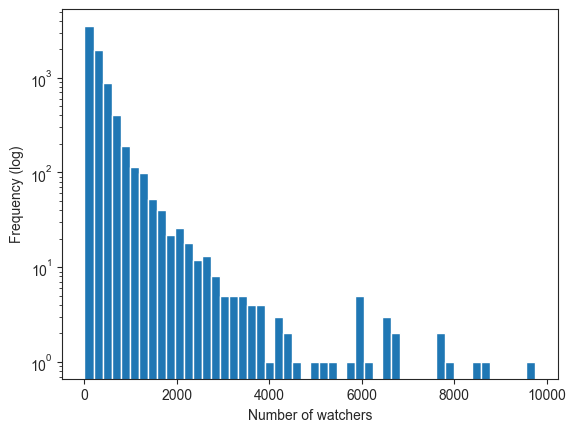

In [21]:
df["watchers_count"].plot.hist(bins=50, logy=True, xlabel="Number of watchers", ylabel="Frequency (log)")

In [22]:
display(df[df["watchers_count"] > 500].shape[0])
display(df[df["watchers_count"] > 1000].shape[0])
display(df[df["watchers_count"] > 5000].shape[0])

1370

431

21

In [23]:
df.sort_values(by="watchers_count", ascending=False).head()

owner                         name  \
id                                                       
13491895  EbookFoundation       free-programming-books   
60493101          jwasham  coding-interview-university   
28457823     freeCodeCamp                 freeCodeCamp   
2325298          torvalds                        linux   
21737465     sindresorhus                      awesome   

                                                        url     size  \
id                                                                     
13491895  https://github.com/EbookFoundation/free-progra...    18628   
60493101  https://github.com/jwasham/coding-interview-un...    22281   
28457823       https://github.com/freeCodeCamp/freeCodeCamp   449544   
2325298                   https://github.com/torvalds/linux  5114330   
21737465            https://github.com/sindresorhus/awesome     1517   

         default_branch       license    language  \
id                                                  
13491895           main     CC-BY-4.0        None   
60493101           main  CC-BY-SA-4.0        None   
28457823           main  BSD-3-Clause  TypeScript   
2325298          master   NOASSERTION           C   
21737465           main       CC0-1.0        None   

                                                  languages  \
id                                                            
13491895                                                 {}   
60493101                                                 {}   
28457823  {'TypeScript': 2268093, 'JavaScript': 954807, ...   
2325298   {'C': 1282300335, 'Assembly': 9568460, 'Shell'...   
21737465                                                 {}   

                                                description  \
id                                                            
13491895         :books: Freely available programming books   
60493101  A complete computer science study plan to beco...   
28457823  freeCodeCamp.org's open-source codebase and cu...   
2325298                            Linux kernel source tree   
21737465  😎 Awesome lists about all kinds of interesting...   

                                                   homepage  ...  \
id                                                           ...   
13491895  https://ebookfoundation.github.io/free-program...  ...   
60493101                                               None  ...   
28457823           http://contribute.freecodecamp.org/intro  ...   
2325298                                                None  ...   
21737465                                               None  ...   

         open_issues_count has_issues has_discussions has_wiki  has_pages  \
id                                                                          
13491895                35       True           False    False       True   
60493101                44       True           False    False      False   
28457823               236       True           False    False      False   
2325298                366      False           False    False      False   
21737465                38       True           False    False       True   

          has_projects  has_downloads  is_fork  is_template  is_archived  
id                                                                        
13491895         False           True    False        False        False  
60493101         False           True    False        False        False  
28457823          True           True    False        False        False  
2325298           True           True    False        False        False  
21737465         False           True    False        False        False  

[5 rows x 27 columns]

Similar to the distribution of stars and forks, 75% of the repositories have less than around 400 watchers, while the remaining 25% of repositories have from 400 to almost 10.000 watchers.
However, it should be noted that the source data were not explicitly collected based on the number of watchers, and the results here are based only on top repositories by the other two metrics.

## Other Numerical Properties

We can analyze a few other interesting numerical properties of repositories.

### Number of Open Issues and Pull Requests

In [24]:
df["open_issues_count"].describe()

count     7424.000000
mean       345.040140
std       1032.803631
min          0.000000
25%         18.000000
50%         84.000000
75%        289.250000
max      29506.000000
Name: open_issues_count, dtype: float64

<Axes: xlabel='Number of open issues and PRs', ylabel='Frequency (log)'>

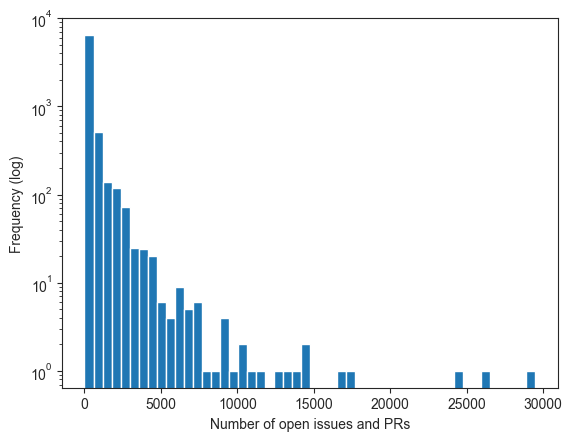

In [25]:
df["open_issues_count"].plot.hist(bins=50, logy=True, xlabel="Number of open issues and PRs", ylabel="Frequency (log)")

In [26]:
display(df[df["open_issues_count"] > 100].shape[0])
display(df[df["open_issues_count"] > 500].shape[0])
display(df[df["open_issues_count"] > 1000].shape[0])
display(df[df["open_issues_count"] > 5000].shape[0])

3458

1134

535

48

In [27]:
df.sort_values(by="open_issues_count", ascending=False).head()

owner                         name  \
id                                                        
281975310  type-challenges              type-challenges   
228683419           google  it-cert-automation-practice   
75821432              llvm                 llvm-project   
1300192            octocat                  Spoon-Knife   
177736533           996icu                      996.ICU   

                                                         url     size  \
id                                                                      
281975310  https://github.com/type-challenges/type-challe...     2836   
228683419  https://github.com/google/it-cert-automation-p...       16   
75821432                https://github.com/llvm/llvm-project  1523608   
1300192               https://github.com/octocat/Spoon-Knife        2   
177736533                  https://github.com/996icu/996.ICU   187804   

          default_branch      license    language  \
id                                                  
281975310           main          MIT  TypeScript   
228683419         master   Apache-2.0      Python   
75821432            main  NOASSERTION        LLVM   
1300192             main         None        HTML   
177736533         master  NOASSERTION        None   

                                                   languages  \
id                                                             
281975310  {'TypeScript': 173759, 'HTML': 2046, 'CSS': 96...   
228683419                                   {'Python': 2407}   
75821432   {'LLVM': 496184046, 'C++': 444876991, 'C': 228...   
1300192                            {'HTML': 355, 'CSS': 256}   
177736533                                                 {}   

                                                 description  \
id                                                             
281975310  Collection of TypeScript type challenges with ...   
228683419  Google IT Automation with Python Professional ...   
75821432   The LLVM Project is a collection of modular an...   
1300192        This repo is for demonstration purposes only.   
177736533  Repo for counting stars and contributing. Pres...   

                       homepage  ... open_issues_count has_issues  \
id                               ...                                
281975310  https://tsch.js.org/  ...             29506       True   
228683419                  None  ...             26506       True   
75821432        http://llvm.org  ...             24631       True   
1300192                    None  ...             17559       True   
177736533       https://996.icu  ...             16707      False   

          has_discussions has_wiki  has_pages  has_projects  has_downloads  \
id                                                                           
281975310            True    False      False          True           True   
228683419           False     True      False          True           True   
75821432            False    False      False         False           True   
1300192             False     True      False          True           True   
177736533           False    False      False         False           True   

           is_fork  is_template  is_archived  
id                                            
281975310    False        False        False  
228683419    False        False        False  
75821432     False        False        False  
1300192      False        False        False  
177736533    False        False        False  

[5 rows x 27 columns]

We see a similar distribution of open issues and PRs as with previous repository properties.
More than a half of repositories have less than 100 open issues and PRs, and only less than 600 repositories have more than 1000 issues and PRs open.
The repository with the most opened issues is `type-challenges/type-challenges`, where the issues are answers for programming challenges.

### Number of Topics

In [28]:
df["topics"].map(len).describe()

count    7424.000000
mean        5.385102
std         5.701214
min         0.000000
25%         0.000000
50%         4.000000
75%         8.000000
max        20.000000
Name: topics, dtype: float64

In [29]:
df[(df["topics"].map(len) > 0) & (df["topics"].map(len) < 20)]["topics"].map(len).describe()

count    4592.000000
mean        7.630444
std         4.437515
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        19.000000
Name: topics, dtype: float64

<Axes: xlabel='Number of topics', ylabel='Frequency (log)'>

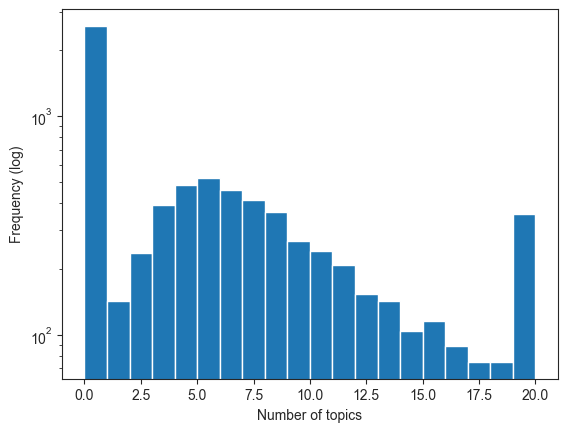

In [30]:
df["topics"].map(len).plot.hist(bins=20, logy=True, xlabel="Number of topics", ylabel="Frequency (log)")

In [31]:
display(df[df["topics"].map(len) == 0].shape[0])
display(df[(df["topics"].map(len) > 0) & (df["topics"].map(len) < 20)].shape[0])
display(df[df["topics"].map(len) == 20].shape[0])

2585

4592

247

In [32]:
df.sort_values(by="topics", key=lambda col: col.str.len(), ascending=False).head()

owner                       name  \
id                                                     
93438176   ZoranPandovski               al-go-rithms   
91253698             ccxt                       ccxt   
144152935       trimstray  test-your-sysadmin-skills   
43425480    wilsonfreitas              awesome-quant   
43441403           strapi                     strapi   

                                                         url     size  \
id                                                                      
93438176      https://github.com/ZoranPandovski/al-go-rithms    57563   
91253698                        https://github.com/ccxt/ccxt  3247301   
144152935  https://github.com/trimstray/test-your-sysadmi...     1312   
43425480      https://github.com/wilsonfreitas/awesome-quant     2141   
43441403                    https://github.com/strapi/strapi   507472   

          default_branch      license          language  \
id                                                        
93438176          master      CC0-1.0  Jupyter Notebook   
91253698          master          MIT            Python   
144152935         master          MIT              None   
43425480          master         None            Python   
43441403         develop  NOASSERTION        TypeScript   

                                                   languages  \
id                                                             
93438176   {'Jupyter Notebook': 21909905, 'C++': 1692994,...   
91253698   {'Python': 28162915, 'C#': 26223722, 'TypeScri...   
144152935                                                 {}   
43425480                         {'Python': 6806, 'CSS': 17}   
43441403   {'TypeScript': 7400380, 'JavaScript': 2459149,...   

                                                 description  \
id                                                             
93438176   :musical_note: Algorithms written in different...   
91253698   A JavaScript / TypeScript / Python / C# / PHP ...   
144152935  A collection of Linux Sysadmin Test Questions ...   
43425480   A curated list of insanely awesome libraries, ...   
43441403   🚀 Strapi is the leading open-source headless C...   

                                                 homepage  ...  \
id                                                         ...   
93438176                                             None  ...   
91253698                            https://docs.ccxt.com  ...   
144152935                                            None  ...   
43425480   https://wilsonfreitas.github.io/awesome-quant/  ...   
43441403                                https://strapi.io  ...   

          open_issues_count has_issues has_discussions has_wiki  has_pages  \
id                                                                           
93438176                 64       True            True     True       True   
91253698               1227       True           False     True       True   
144152935                17       True           False    False      False   
43425480                 13       True           False     True       True   
43441403                733       True           False    False      False   

           has_projects  has_downloads  is_fork  is_template  is_archived  
id                                                                         
93438176           True           True    False        False        False  
91253698           True           True    False        False        False  
144152935         False           True    False        False        False  
43425480           True           True    False        False        False  
43441403           True           True    False        False        False  

[5 rows x 27 columns]

The distribution of the number of topics is quite different from the previous distributions.
There are a lot of repositories without any topics, and many repositories with 20 topics, which is the maximum number of topics a repository can have.
Excluding these two outliers, most repositories have between 4 and 10 topics.

### Size & Lines of Code

In [33]:
df["lines"] = df["languages"].apply(pd.Series).sum(axis=1).astype(int)

In [34]:
df[["size", "lines"]].describe()

size         lines
count  7.424000e+03  7.424000e+03
mean   2.064338e+05  7.559004e+06
std    1.794956e+06  5.003956e+07
min    0.000000e+00  0.000000e+00
25%    1.658750e+03  2.689650e+04
50%    1.318450e+04  3.901455e+05
75%    7.591225e+04  2.529126e+06
max    1.006752e+08  1.346571e+09

In [35]:
df.sort_values(by="size", ascending=False).head()

owner           name  \
id                                      
246079929         owid  covid-19-data   
1409811          cdnjs          cdnjs   
120360765     chromium       chromium   
3565909    raspberrypi       firmware   
189256120    vernesong      OpenClash   

                                               url       size default_branch  \
id                                                                             
246079929    https://github.com/owid/covid-19-data  100675175         master   
1409811             https://github.com/cdnjs/cdnjs   52604791         master   
120360765     https://github.com/chromium/chromium   47152920           main   
3565909    https://github.com/raspberrypi/firmware   39892092         master   
189256120   https://github.com/vernesong/OpenClash   39845406         master   

                license    language  \
id                                    
246079929          None      Python   
1409811             MIT        None   
120360765  BSD-3-Clause        None   
3565909            None        None   
189256120           MIT  JavaScript   

                                                   languages  \
id                                                             
246079929  {'Python': 1501762, 'HTML': 445156, 'Jupyter N...   
1409811                                                   {}   
120360765                                                 {}   
3565909                                                   {}   
189256120  {'JavaScript': 600544, 'Shell': 569815, 'Lua':...   

                                                 description  \
id                                                             
246079929  Data on COVID-19 (coronavirus) cases, deaths, ...   
1409811    🤖 CDN assets - The #1 free and open source CDN...   
120360765  The official GitHub mirror of the Chromium source   
3565909    This repository contains pre-compiled binaries...   
189256120                         A Clash Client For OpenWrt   

                                                  homepage  ... has_issues  \
id                                                          ...              
246079929           https://ourworldindata.org/coronavirus  ...       True   
1409811                                  https://cdnjs.com  ...       True   
120360765  https://chromium.googlesource.com/chromium/src/  ...      False   
3565909                                               None  ...       True   
189256120                                             None  ...       True   

          has_discussions has_wiki has_pages  has_projects  has_downloads  \
id                                                                          
246079929            True    False     False         False           True   
1409811              True    False     False         False           True   
120360765           False    False     False         False           True   
3565909             False     True     False          True           True   
189256120            True     True     False         False           True   

           is_fork  is_template  is_archived    lines  
id                                                     
246079929    False        False        False  2025753  
1409811      False        False        False        0  
120360765    False        False        False        0  
3565909      False        False        False        0  
189256120    False        False        False  1812346  

[5 rows x 28 columns]

In [36]:
df.sort_values(by="lines", ascending=False).head()

owner              name  \
id                                        
75821432         llvm      llvm-project   
23891194        Azure  azure-powershell   
2325298      torvalds             linux   
7408108     RT-Thread         rt-thread   
3199002   raspberrypi             linux   

                                                url     size default_branch  \
id                                                                            
75821432       https://github.com/llvm/llvm-project  1523608           main   
23891194  https://github.com/Azure/azure-powershell  2097965           main   
2325298           https://github.com/torvalds/linux  5114330         master   
7408108      https://github.com/RT-Thread/rt-thread   866908         master   
3199002        https://github.com/raspberrypi/linux  4098537      rpi-6.6.y   

              license language  \
id                               
75821432  NOASSERTION     LLVM   
23891194  NOASSERTION       C#   
2325298   NOASSERTION        C   
7408108    Apache-2.0        C   
3199002   NOASSERTION        C   

                                                  languages  \
id                                                            
75821432  {'LLVM': 496184046, 'C++': 444876991, 'C': 228...   
23891194  {'C#': 1202516016, 'PowerShell': 139034925, 'B...   
2325298   {'C': 1282300335, 'Assembly': 9568460, 'Shell'...   
7408108   {'C': 1234433878, 'Assembly': 23622214, 'HTML'...   
3199002   {'C': 1222768149, 'Assembly': 9830805, 'Shell'...   

                                                description  \
id                                                            
75821432  The LLVM Project is a collection of modular an...   
23891194                         Microsoft Azure PowerShell   
2325298                            Linux kernel source tree   
7408108   RT-Thread is an open source IoT real-time oper...   
3199002   Kernel source tree for Raspberry Pi-provided k...   

                          homepage  ... has_issues has_discussions has_wiki  \
id                                  ...                                       
75821432           http://llvm.org  ...       True           False    False   
23891194                      None  ...       True            True     True   
2325298                       None  ...      False           False    False   
7408108   https://www.rt-thread.io  ...       True            True     True   
3199002                       None  ...       True           False     True   

         has_pages  has_projects  has_downloads  is_fork  is_template  \
id                                                                      
75821432     False         False           True    False        False   
23891194     False          True           True    False        False   
2325298      False          True           True    False        False   
7408108      False          True           True    False        False   
3199002      False         False           True    False        False   

          is_archived       lines  
id                                 
75821432        False  1346570654  
23891194        False  1341576646  
2325298         False  1304444078  
7408108         False  1267667855  
3199002         False  1244854671  

[5 rows x 28 columns]

Note that neither of these two metrics is completely reliable.
The repository size may not be accurate because of how GitHub stores repositories and deduplicates objects to achieve lower storage cost.
The number of lines is also not always accurate, as GitHub sometimes fails to detect the languages of a repository.
For example, this happens on some large repositories such as cdnjs, Chromium and Firefox, which causes the number of lines to be zero.

## Boolean Properties

We will analyze a few interesting boolean properties about repositories.

In [37]:
def number_of_with_without(series: pd.Series) -> (int, int):
    """Returns the number of rows that do and do not match the boolean series."""
    return df[series].shape[0], df[~series].shape[0]

### Social Properties

In [38]:
# Number of repositories with/without description
number_of_with_without(~df["description"].isnull())

(6755, 669)

In [39]:
# Number of repositories with/without homepage
number_of_with_without(~df["homepage"].isnull())

(4251, 3173)

In [40]:
# Number of repositories with/without topics
number_of_with_without(df["topics"].map(len) != 0)

(4839, 2585)

In [41]:
# Number of repositories with/without license
number_of_with_without(~df["license"].isnull())

(6031, 1393)

Most of the popular repositories follow commonly-recommended best practices of setting the repository description, homepage, topics and licenses.
Almost all the repositories have the description set, while the amount of repositories with the homepage or topics set is smaller, but still more than a half.

### Features Properties

In [42]:
# Number of repositories with issues enabled
number_of_with_without(df["has_issues"])

(6961, 463)

In [43]:
# Number of repositories with discussions enabled
number_of_with_without(df["has_discussions"])

(2264, 5160)

In [44]:
# Number of repositories with wiki enabled
number_of_with_without(df["has_wiki"])

(4942, 2482)

In [45]:
# Number of repositories with pages enabled
number_of_with_without(df["has_pages"])

(1817, 5607)

In [46]:
# Number of repositories with projects enabled
number_of_with_without(df["has_projects"])

(5796, 1628)

In [47]:
# Number of repositories with downloads enabled
number_of_with_without(df["has_downloads"])

(7307, 117)

Almost all the repositories have issues enabled, while most of the repositories do not have discussions enabled, as they are a recently added feature.
Additionally, most the the repositories have wiki and projects enabled, but most do not have GitHub Pages enabled.
Downloads are a legacy feature that does not exist since 2013, and only repositories with it disabled are the ones that disabled it before it was removed.

## Date Properties

For each repository we know the dates when the repository was created, last updated and last pushed to. 

### Created Date

The created date contains the date and time when the repository was created.

In [48]:
df["created_at"].describe()

count                                   7424
mean     2017-01-16 07:02:33.973464576+00:00
min                2008-03-10 07:34:08+00:00
25%                2014-07-14 12:06:24+00:00
50%                2016-12-20 07:36:16+00:00
75%      2019-09-02 11:02:30.750000128+00:00
max                2024-07-08 11:32:35+00:00
Name: created_at, dtype: object

In [49]:
df.sort_values(by="created_at")

owner                  name  \
id                                                 
3282             preservim              nerdtree   
3314                 spree                 spree   
8393            thoughtbot             paperclip   
8514                 rails                 rails   
15435              Shopify                liquid   
...                    ...                   ...   
808045485  LadybirdBrowser              ladybird   
812323913      tech-shrimp   docker_image_pusher   
813254316            cmliu  CF-Workers-docker.io   
815467392      wukongdaily      DockerTarBuilder   
825726640      ShiArthur03           ShiArthur03   

                                                         url    size  \
id                                                                     
3282                   https://github.com/preservim/nerdtree    1995   
3314                          https://github.com/spree/spree  155135   
8393                 https://github.com/thoughtbot/paperclip    3579   
8514                          https://github.com/rails/rails  280094   
15435                      https://github.com/Shopify/liquid    5705   
...                                                      ...     ...   
808045485        https://github.com/LadybirdBrowser/ladybird  226351   
812323913  https://github.com/tech-shrimp/docker_image_pu...     734   
813254316      https://github.com/cmliu/CF-Workers-docker.io      25   
815467392    https://github.com/wukongdaily/DockerTarBuilder      54   
825726640         https://github.com/ShiArthur03/ShiArthur03  257015   

          default_branch       license    language  \
id                                                   
3282              master         WTFPL  Vim Script   
3314                main  BSD-3-Clause        Ruby   
8393                main   NOASSERTION        Ruby   
8514                main           MIT        Ruby   
15435               main           MIT        Ruby   
...                  ...           ...         ...   
808045485         master  BSD-2-Clause         C++   
812323913           main    Apache-2.0        None   
813254316           main          None  JavaScript   
815467392         master       GPL-3.0        None   
825726640           main       GPL-3.0      MATLAB   

                                                   languages  \
id                                                             
3282                                  {'Vim Script': 217175}   
3314       {'Ruby': 3046097, 'HTML': 26893, 'Shell': 4764...   
8393          {'Ruby': 522650, 'Gherkin': 8317, 'HTML': 407}   
8514       {'Ruby': 16757609, 'JavaScript': 216319, 'HTML...   
15435                      {'Ruby': 467586, 'Liquid': 72882}   
...                                                      ...   
808045485  {'C++': 24568535, 'JavaScript': 2309458, 'HTML...   
812323913                                                 {}   
813254316                               {'JavaScript': 9865}   
815467392                                                 {}   
825726640                                  {'MATLAB': 65005}   

                                                 description  \
id                                                             
3282                         A tree explorer plugin for vim.   
3314       An open source eCommerce platform giving you f...   
8393        Easy file attachment management for ActiveRecord   
8514                                           Ruby on Rails   
15435      Liquid markup language. Safe, customer facing ...   
...                                                      ...   
808045485                      Truly independent web browser   
812323913  使用Github Action将国外的Docker镜像转存到阿里云私有仓库，供国内服务器使用...   
813254316  这个项目是一个基于 Cloudflare Workers 的 Docker 镜像代理工具。它...   
815467392                      它是一个工作流。可快速构建指定架构/平台的docker镜像   
825726640                                               None   

                                      

<Axes: xlabel='Year created', ylabel='Frequency'>

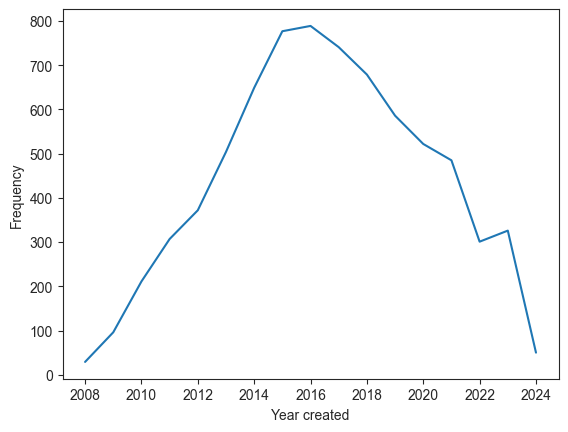

In [50]:
df.groupby(df["created_at"].dt.year).size().plot(xlabel="Year created", ylabel="Frequency")

The oldest repository in our list, `preservim/nerdtree`, has been created in March 2008, only around a month after GitHub was created.
The newest repository in the list, `ShiArthur03/ShiArthur03`, has been created in July 2024, less than a week ago at the time of writing.

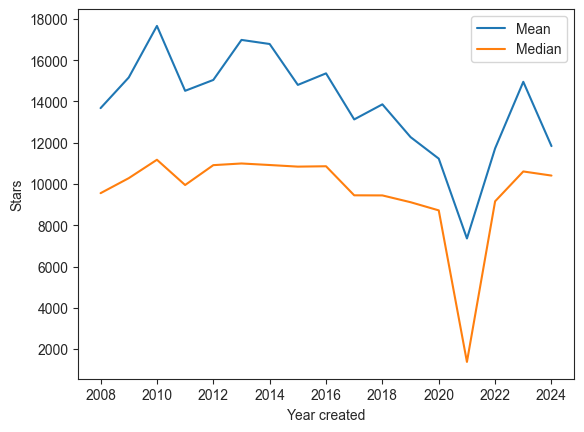

In [51]:
ax = df.groupby(df["created_at"].dt.year).agg({"stargazers_count": ("mean", "median")}).plot()
ax.set_xlabel("Year created")
ax.set_ylabel("Stars")
ax.legend(["Mean", "Median"])

The median number of stars per creation year seems to be roughly the same, although older repositories are slightly more popular.
However, there a large drop of popular repositories created in 2021.
The same drop can also be seen in the mean number of stars, with a small spike of popular repositories created in 2023.
Based on the mean number of stars, older repositories are generally more popular.

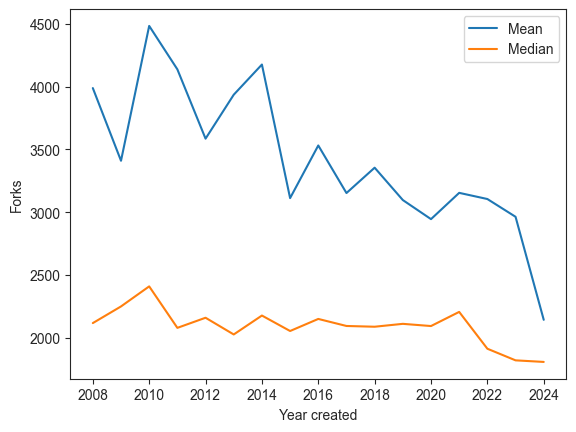

In [52]:
ax = df.groupby(df["created_at"].dt.year).agg({"forks_count": ("mean", "median")}).plot()
ax.set_xlabel("Year created")
ax.set_ylabel("Forks")
ax.legend(["Mean", "Median"])

Similar as for stars, older repositories have more forks, both according to the median and mean.
There are no unusual large spikes or drops.

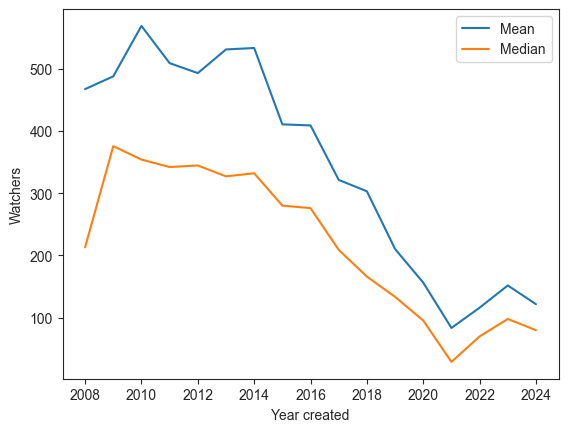

In [53]:
ax = df.groupby(df["created_at"].dt.year).agg({"watchers_count": ("mean", "median")}).plot()
ax.set_xlabel("Year created")
ax.set_ylabel("Watchers")
ax.legend(["Mean", "Median"])

The number of watchers per creation year also has a similar pattern, with the same drop in 2021 as for stars.

### Updated Date

The updated date represents the date and time when the repository object was last updated.
The exact events that are considered updates are not known, but they include changing the repository description, homepage and topics, adding or editing wiki pages, starring a repository, etc.
Note that it is not necessary that a push affects the updated date; that will only happen if it triggers an update to the repository object, like changing the primary repository language.

In [54]:
df["updated_at"].describe()

count                                   7424
mean     2024-06-10 12:59:36.343345664+00:00
min                2017-04-26 23:13:47+00:00
25%         2024-07-12 08:41:35.500000+00:00
50%                2024-07-13 13:17:19+00:00
75%         2024-07-13 18:44:45.500000+00:00
max                2024-07-14 00:30:28+00:00
Name: updated_at, dtype: object

<Axes: xlabel='Year last updated', ylabel='Frequency'>

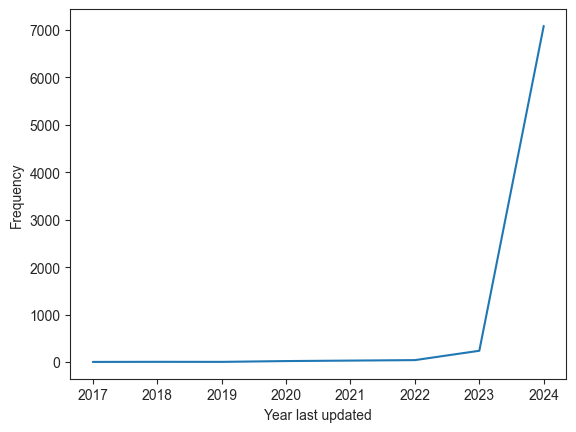

In [55]:
df.groupby(df["updated_at"].dt.year).size().plot(xlabel="Year last updated", ylabel="Frequency")

In [56]:
display(df[df["updated_at"] < pd.Timestamp("2024-01-01", tz="UTC")].shape[0])
display(df[df["updated_at"] < pd.Timestamp("2024-06-01", tz="UTC")].shape[0])

343

601

In [57]:
display(df[df["updated_at"] >= pd.Timestamp("2024-07-07", tz="UTC")].shape[0])

6487

Almost all the repositories have been updated in the last week (between 2024-07-07 and 2024-07-14).
This effectively means that almost all the repositories have received at least one star in that week.
Less than 350 repositories have not been updated yet in 2024.

### Pushed Date

The pushed date is updated any time a commit is pushed to any of the repository’s branches.

In [58]:
df["pushed_at"].describe()

count                                   7424
mean     2023-12-26 08:37:08.788658432+00:00
min                2010-11-16 21:55:39+00:00
25%      2024-02-16 16:43:54.750000128+00:00
50%                2024-06-29 14:50:05+00:00
75%         2024-07-12 14:18:24.500000+00:00
max                2024-07-14 00:28:29+00:00
Name: pushed_at, dtype: object

<Axes: xlabel='Year last pushed', ylabel='Frequency'>

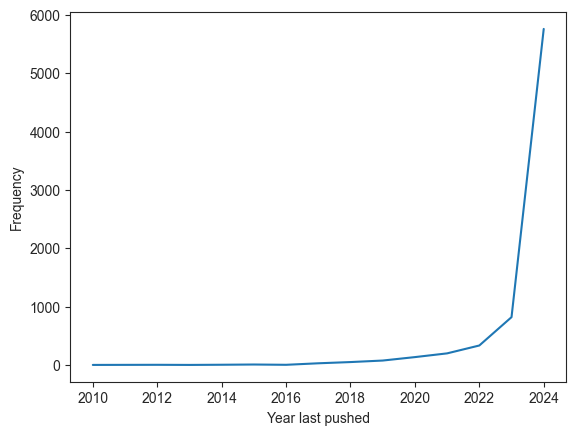

In [59]:
df.groupby(df["pushed_at"].dt.year).size().plot(xlabel="Year last pushed", ylabel="Frequency")

In [60]:
display(df[df["pushed_at"] < pd.Timestamp("2024-01-01", tz="UTC")].shape[0])
display(df[df["pushed_at"] < pd.Timestamp("2024-06-01", tz="UTC")].shape[0])

1663

2851

In [61]:
display(df[df["pushed_at"] >= pd.Timestamp("2024-07-07", tz="UTC")].shape[0])

3193

We can see that most of the repositories have been pushed to in recent months.
However, the pushed dates are generally older than the updated dates.

## Languages

Our data contain both the primary (most used) language, and a list of all languages and their corresponding lines of code, for each repository.

In [62]:
language_info = df["languages"].apply(pd.Series)
languages_by_repositories = language_info.count().astype(int).to_frame(name="repositories")
languages_by_shares = language_info.div(df["lines"], axis=0).sum().astype(float).to_frame(name="shares")
languages_by_lines = language_info.sum().astype(int).to_frame(name="lines")
languages = pd.concat([languages_by_repositories, languages_by_shares, languages_by_lines], axis=1)
languages.index.rename("language", inplace=True)

### Main Language

First, we will analyze the most popular primary languages of our repositories.

In [63]:
df["language"].describe()

count           6705
unique           113
top       JavaScript
freq            1372
Name: language, dtype: object

In [64]:
df["language"].value_counts()

language
JavaScript    1372
Python         941
TypeScript     634
Java           543
Go             460
              ... 
HLSL             1
PostScript       1
Solidity         1
Mojo             1
Logos            1
Name: count, Length: 113, dtype: int64

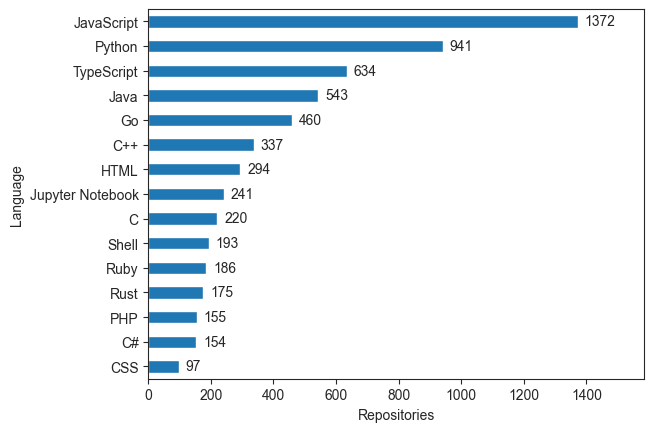

In [65]:
ax = df["language"].value_counts().nlargest(15).plot.barh()
ax.set_xlabel("Repositories")
ax.set_ylabel("Language")
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
ax.invert_yaxis()

We can see that the most popular main language is JavaScript, followed by Python and TypeScript.

### All Languages by Repositories

We can also analyze all languages used by each repository, measured by the number of repositories for each language.

In [66]:
languages.sort_values(by="repositories", ascending=False)

repositories       shares       lines
language                                         
JavaScript          3535  1303.899580  2487440928
Shell               3319   213.001402   358015555
HTML                3008   382.196074  2168905897
Python              2316   908.591148  4607446374
CSS                 2241   158.549579   313007570
...                  ...          ...         ...
Nearley                1     0.000799        9654
Befunge                1     0.000015         173
AL                     1     0.000009         102
Dylan                  1     0.000006          70
Grace                  1     0.000005          59

[428 rows x 3 columns]

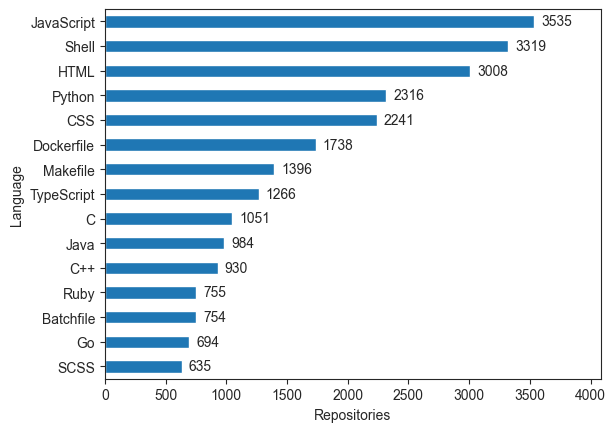

In [67]:
ax = languages["repositories"].nlargest(15).plot.barh()
ax.set_xlabel("Repositories")
ax.set_ylabel("Language")
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
ax.invert_yaxis()

Here, JavaScript is still in the lead, however, Python is only in the fourth place, behind Shell and HTML.
This is likely because a lot of repositories use Shell scripts for various utilities.
Similarly, Dockerfile and Makefile are also in the top 10 languages.

In [68]:
# Languages included in the top 15 in both lists
set(df["language"].value_counts().nlargest(15).index) & set(languages["repositories"].nlargest(15).index)

{'C',
 'C++',
 'CSS',
 'Go',
 'HTML',
 'Java',
 'JavaScript',
 'Python',
 'Ruby',
 'Shell',
 'TypeScript'}

In [69]:
# Languages included in the top 15 only in the main language list
set(df["language"].value_counts().nlargest(15).index) - set(languages["repositories"].nlargest(15).index)

{'C#', 'Jupyter Notebook', 'PHP', 'Rust'}

In [70]:
# Languages included in the top 15 only in the all languages list
set(languages["repositories"].nlargest(15).index) - set(df["language"].value_counts().nlargest(15).index)

{'Batchfile', 'Dockerfile', 'Makefile', 'SCSS'}

We can see that most top 15 languages are included in both lists.

### All Languages by Lines of Code

We can also analyze all languages used by each repository, measured by lines of code for each language.

In [71]:
languages.sort_values(by="lines", ascending=False)

repositories        shares        lines
language                                                 
C                         1051  2.174670e+02  10321882570
Java                       984  4.988207e+02   7679202159
C++                        930  3.000191e+02   6627523428
Jupyter Notebook           440  2.325691e+02   5142243167
Python                    2316  9.085911e+02   4607446374
...                        ...           ...          ...
Opa                          1  3.388624e-04           20
Shen                         1  3.219193e-04           19
Motoko                       1  6.145334e-07           16
Filebench WML                1  1.690789e-08           15
SRecode Template             1  5.549539e-08            2

[428 rows x 3 columns]

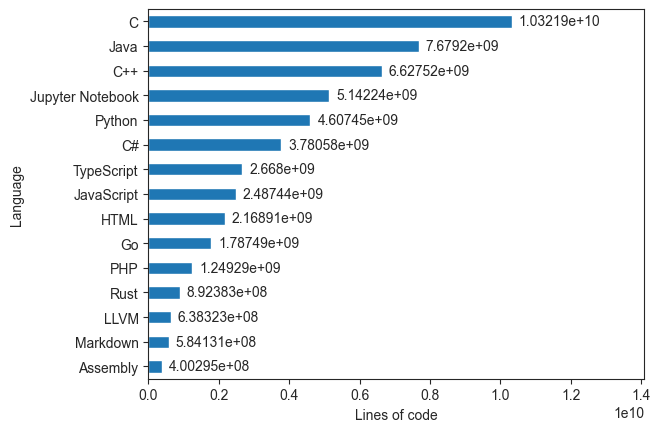

In [72]:
ax = languages["lines"].nlargest(15).plot.barh()
ax.set_xlabel("Lines of code")
ax.set_ylabel("Language")
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlim(right=ax.get_xlim()[1] * 1.3)
ax.invert_yaxis()

The top languages by the lines of code are quite different from the previous lists.
Languages like C, C++ and Java are in the lead, probably because they are used by many large projects such as Linux, Android and LLVM.
Jupyter Notebook has an unrealistically large number of lines of code, as it is stored in complex and long JSON files.
Python is only in the 5th place, while JavaScript and TypeScript are even lower.

### All Languages by Shares

For a possibly more meaningful comparison, we can compare languages by their shares in each repository.

In [73]:
languages.sort_values(by="shares", ascending=False)

repositories        shares       lines
language                                                
JavaScript                3535  1.303900e+03  2487440928
Python                    2316  9.085911e+02  4607446374
TypeScript                1266  5.845524e+02  2668002949
Java                       984  4.988207e+02  7679202159
Go                         694  4.234658e+02  1787488684
...                        ...           ...         ...
RouterOS Script              2  2.887938e-06          82
Motoko                       1  6.145334e-07          16
Nextflow                     1  8.904823e-08          79
SRecode Template             1  5.549539e-08           2
Filebench WML                1  1.690789e-08          15

[428 rows x 3 columns]

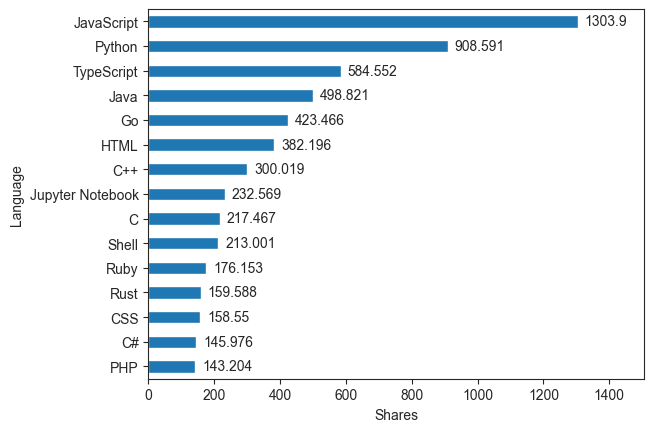

In [74]:
ax = languages["shares"].nlargest(15).plot.barh()
ax.set_xlabel("Shares")
ax.set_ylabel("Language")
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
ax.invert_yaxis()

The distribution here is very similar to the distribution of the top 15 min repository languages.
This is likely because many repositories mostly use only one primary language.

In [75]:
# Languages included in the top 15 in both lists
set(df["language"].value_counts().nlargest(15).index) & set(languages["shares"].nlargest(15).index)

{'C',
 'C#',
 'C++',
 'CSS',
 'Go',
 'HTML',
 'Java',
 'JavaScript',
 'Jupyter Notebook',
 'PHP',
 'Python',
 'Ruby',
 'Rust',
 'Shell',
 'TypeScript'}

The top 15 languages in both lists are exactly the same, only with some minor variations in their order.

### Stars by Main Language

We can check how popular each language is in terms of stars.

In [76]:
df.groupby("language")["stargazers_count"].describe()

count          mean           std      min       25%  \
language                                                                 
ANTLR               1.0   9977.000000           NaN   9977.0   9977.00   
ApacheConf          1.0    396.000000           NaN    396.0    396.00   
Apex                1.0    100.000000           NaN    100.0    100.00   
Arduino             1.0     97.000000           NaN     97.0     97.00   
Assembly            9.0  16120.888889  17739.398851     10.0   9917.00   
...                 ...           ...           ...      ...       ...   
Vue                46.0  15455.847826  14620.829033   1175.0   8646.75   
WebAssembly         1.0  16601.000000           NaN  16601.0  16601.00   
Wikitext            1.0   9129.000000           NaN   9129.0   9129.00   
Zig                 3.0  37715.000000  31864.299208   8897.0  20605.00   
reStructuredText    2.0   2142.500000   2076.772616    674.0   1408.25   

                      50%       75%      max  
language                                      
ANTLR              9977.0   9977.00   9977.0  
ApacheConf          396.0    396.00    396.0  
Apex                100.0    100.00    100.0  
Arduino              97.0     97.00     97.0  
Assembly          10388.0  15401.00  57116.0  
...                   ...       ...      ...  
Vue               10725.5  17342.75  87101.0  
WebAssembly       16601.0  16601.00  16601.0  
Wikitext           9129.0   9129.00   9129.0  
Zig               32313.0  52124.00  71935.0  
reStructuredText   2142.5   2876.75   3611.0  

[113 rows x 8 columns]

In [77]:
stars_for_languages = df.groupby("language")["stargazers_count"].agg(total="sum", average="mean", repositories="count")

First, we can calculate the total number of stars for each language.

In [78]:
stars_for_languages.sort_values(by="total", ascending=False)

total       average  repositories
language                                        
JavaScript  16161416  11779.457726          1372
Python      15389570  16354.484591           941
TypeScript  12193379  19232.458991           634
Go           7570527  16457.667391           460
Java         6357920  11708.876611           543
...              ...           ...           ...
Logos            857    857.000000             1
ApacheConf       396    396.000000             1
Apex             100    100.000000             1
Arduino           97     97.000000             1
IDL               51     51.000000             1

[113 rows x 3 columns]

This obviously favors the most used languages.

Alternatively, we can also rate languages based on the average number of stars.

In [79]:
stars_for_languages.sort_values(by="average", ascending=False)

total  average  repositories
language                                 
Nunjucks     59272  59272.0             1
Julia        45018  45018.0             1
Zig         113145  37715.0             3
V            35547  35547.0             1
Astro        57941  28970.5             2
...            ...      ...           ...
Logos          857    857.0             1
ApacheConf     396    396.0             1
Apex           100    100.0             1
Arduino         97     97.0             1
IDL             51     51.0             1

[113 rows x 3 columns]

The results here are quite different and unexpected.
We can see that this favors languages with very few repositories.

For a better understanding, we can analyze the average number of stars only for commonly used languages.

In [80]:
stars_for_languages.nlargest(15, "repositories").sort_values(by="average", ascending=False)

total       average  repositories
language                                              
TypeScript        12193379  19232.458991           634
Rust               3295595  18831.971429           175
Go                 7570527  16457.667391           460
Python            15389570  16354.484591           941
C++                5407414  16045.738872           337
C                  3115040  14159.272727           220
Shell              2466508  12779.834197           193
C#                 1839139  11942.461039           154
JavaScript        16161416  11779.457726          1372
Java               6357920  11708.876611           543
PHP                1734806  11192.296774           155
Jupyter Notebook   2246935   9323.381743           241
CSS                 899443   9272.608247            97
HTML               2212797   7526.520408           294
Ruby               1139090   6124.139785           186

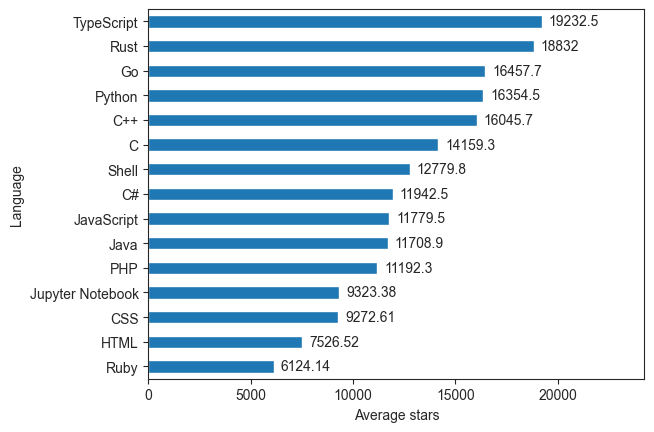

In [81]:
ax = stars_for_languages.nlargest(15, "repositories").sort_values(by="average", ascending=False)["average"].plot.barh()
ax.set_xlabel("Average stars")
ax.set_ylabel("Language")
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlim(right=ax.get_xlim()[1] * 1.2)
ax.invert_yaxis()

In this case, we can see that TypeScript, Rust and Go repositories are the most popular.
Slightly surprisingly, JavaScript is only in the second half of the list.

## Licenses

We will analyze the most used repository licenses.

In [82]:
df["license"].describe()

count     6031
unique      31
top        MIT
freq      2383
Name: license, dtype: object

In [83]:
df["license"].value_counts()

license
MIT                   2383
NOASSERTION           1217
Apache-2.0            1186
GPL-3.0                428
BSD-3-Clause           164
AGPL-3.0               153
GPL-2.0                 89
CC0-1.0                 88
CC-BY-4.0               51
BSD-2-Clause            49
MPL-2.0                 43
CC-BY-SA-4.0            32
Unlicense               29
LGPL-2.1                26
LGPL-3.0                24
ISC                     14
OFL-1.1                 12
WTFPL                   10
Zlib                     8
MIT-0                    4
OSL-3.0                  3
EPL-2.0                  3
BSL-1.0                  3
Vim                      2
EPL-1.0                  2
Artistic-2.0             2
MS-PL                    2
LPPL-1.3c                1
UPL-1.0                  1
0BSD                     1
BSD-3-Clause-Clear       1
Name: count, dtype: int64

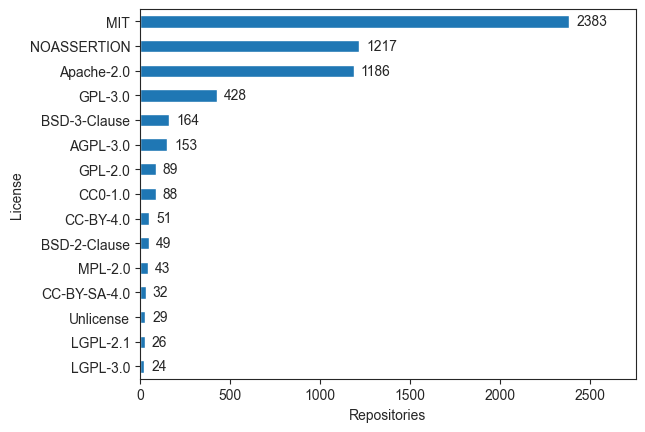

In [84]:
ax = df["license"].value_counts().nlargest(15).plot.barh()
ax.set_xlabel("Repositories")
ax.set_ylabel("License")
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
ax.invert_yaxis()

The MIT license is by far the most common, followed by Apache 2.0 with over 1000 repositories less.
Note that `NOASSERTION` means that the repository has a license set, but GitHub was unable to classify it, which may happen if the repository uses a custom license or multiple licenses.
We can see that this happens quite often and is the second most common "license type" of our repositories.

## Topics

We can analyze the topics of all popular repositories.

In [85]:
df["topics"].explode().describe()

count             39979
unique            12927
top       hacktoberfest
freq                609
Name: topics, dtype: object

In [86]:
df["topics"].explode().value_counts()

topics
hacktoberfest       609
javascript          585
python              514
react               296
machine-learning    246
                   ... 
file-management       1
activerecord          1
activejob             1
html-standard         1
spreecommerce         1
Name: count, Length: 12927, dtype: int64

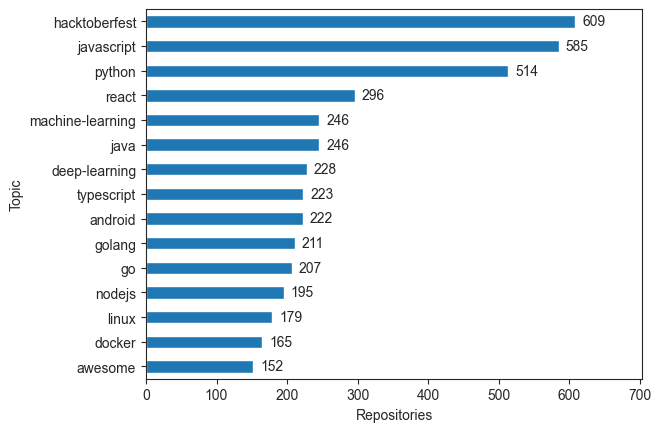

In [87]:
ax = df["topics"].explode().value_counts().nlargest(15).plot.barh()
ax.set_xlabel("Repositories")
ax.set_ylabel("Topic")
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
ax.invert_yaxis()

The most popular topic is `hacktoberfest`, which indicates the repository participates in the Hacktoberfest event.
Topics for languages are also very popular, most common being `javascript`, `python` and `java`. 

In [88]:
# We exclude "technical" properties like `hacktoberfest` and common languages
all_topics = df["topics"].explode().value_counts()
excluded_topics = {"hacktoberfest", "javascript", "typescript", "python", "java", "kotlin", "rust", "go", "golang", "html", "css", "php", "ruby", "swift", "c", "cpp", "csharp"}
remaining_topics = all_topics[~all_topics.index.isin(excluded_topics)]

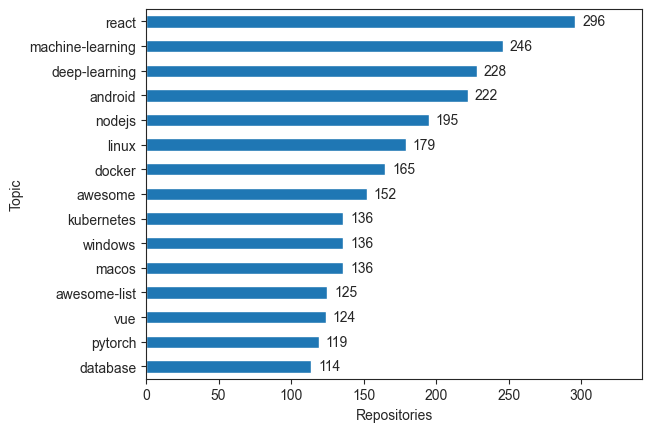

In [89]:
ax = remaining_topics.nlargest(15).plot.barh()
ax.set_xlabel("Repositories")
ax.set_ylabel("Topic")
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
ax.invert_yaxis()

If we exclude `hacktoberfest` and topics for languages, we can see that the most popular topic is `react`, followed by `machine-learning` and `deep-learning`.

## Owners

We can check which users and organizations own most of the popular repositories.

In [90]:
df["owner"].describe()

count                    7424
unique                   5256
top       learn-co-curriculum
freq                      203
Name: owner, dtype: object

In [91]:
df["owner"].value_counts()

owner
learn-co-curriculum           203
microsoft                      84
learn-co-students              71
bloominstituteoftechnology     61
apache                         55
                             ... 
2noise                          1
LadybirdBrowser                 1
tech-shrimp                     1
wukongdaily                     1
rails                           1
Name: count, Length: 5256, dtype: int64

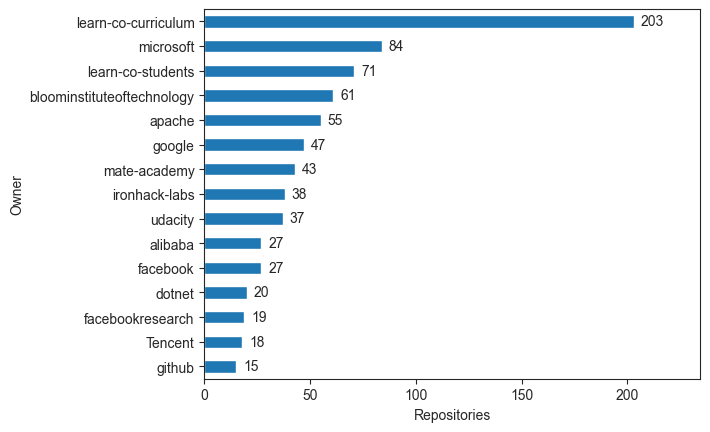

In [92]:
ax = df["owner"].value_counts().nlargest(15).plot.barh()
ax.set_xlabel("Repositories")
ax.set_ylabel("Owner")
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
ax.invert_yaxis()

Most repositories are owned by many distinct users.
Account with by far the most of the popular repositories is `learn-co-curriculum`, which has more than 12.000 repositories, out of which, slightly more than 200 are included in our list.
Another popular account is `learn-co-students`, which seems to belong to the same organization, and has in total over 275.000 repositories.
Most other accounts on the list are, as expected, large companies and organizations. 

## Default Branches

The default branch is the one that shown and cloned by default. We will analyze what the most common default branch names for repositories on our list are.

In [93]:
df["default_branch"].describe()

count       7424
unique       188
top       master
freq        4656
Name: default_branch, dtype: object

In [94]:
df["default_branch"].value_counts()

default_branch
master        4656
main          2128
develop        159
dev            107
gh-pages        28
              ... 
oss              1
Master           1
flow             1
4.1-Stable       1
starter          1
Name: count, Length: 188, dtype: int64

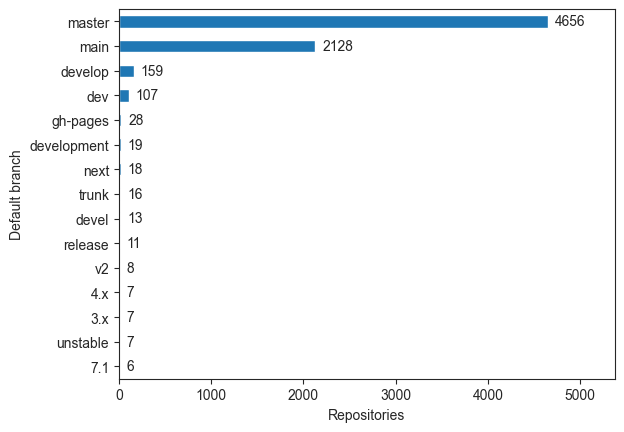

In [95]:
ax = df["default_branch"].value_counts().nlargest(15).plot.barh()
ax.set_xlabel("Repositories")
ax.set_ylabel("Default branch")
ax.bar_label(ax.containers[0], padding=5)
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)
ax.invert_yaxis()

As expected, the most common default branch name is `master`, which has been the default branch name for Git and GitHub until 2020.
It is followed by `main`, which has been the default GitHub branch since 2020.
Other default branch names are used by a lot less repositories.

In [96]:
df.groupby(df["created_at"].dt.year)["default_branch"].agg(pd.Series.mode).head(30)

created_at
2008      main
2009    master
2010    master
2011    master
2012    master
2013    master
2014    master
2015    master
2016    master
2017    master
2018    master
2019    master
2020    master
2021      main
2022      main
2023      main
2024      main
Name: default_branch, dtype: object

We can see that after GitHub implemented the default branch name change, most repositories started using `main`.
It is also the most popular branch name for repositories created in 2008, probably because a lot of existing repositories changed their default branch after 2020.

## Relationship Between the Number of Stargazers, Watchers and Forks

We will analyze if there is any correlation between the number of stargazers, watchers for forks fr popular repositories.

<Axes: xlabel='Stargazers', ylabel='Forks'>

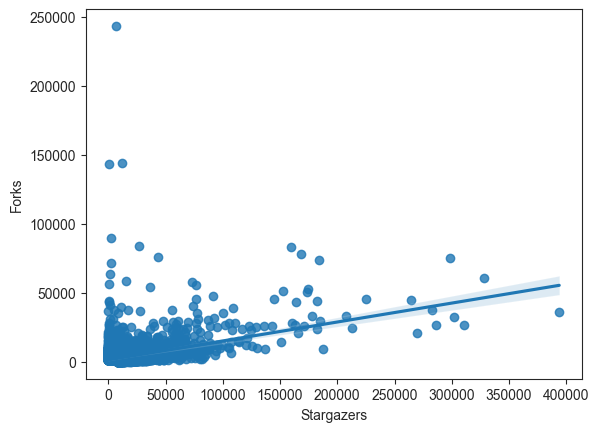

In [97]:
ax = sns.regplot(data=df, x="stargazers_count", y="forks_count")
ax.set_xlabel("Stargazers")
ax.set_ylabel("Forks")
ax

<Axes: xlabel='Watchers', ylabel='Forks'>

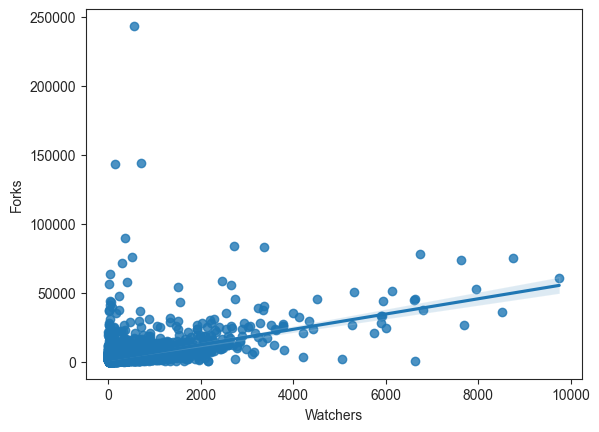

In [98]:
ax = sns.regplot(data=df, x="watchers_count", y="forks_count")
ax.set_xlabel("Watchers")
ax.set_ylabel("Forks")
ax

<Axes: xlabel='Watchers', ylabel='Stargazers'>

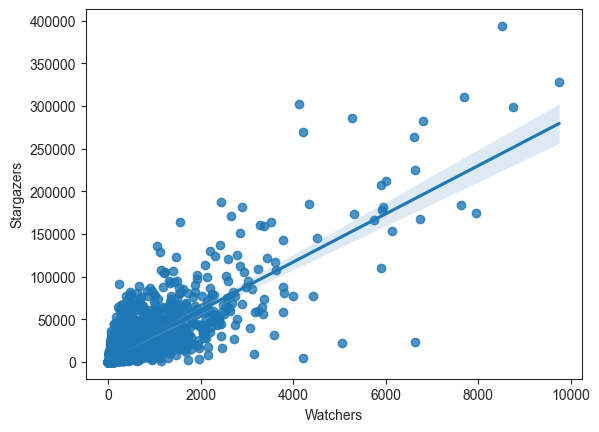

In [99]:
ax = sns.regplot(data=df, x="watchers_count", y="stargazers_count")
ax.set_xlabel("Watchers")
ax.set_ylabel("Stargazers")
ax

There is some correlation between the number of stargazers, watchers and forks, but there are also many outlier points.

## Word Clouds

Finally, we can generate some word clouds.

In [100]:
def show_word_cloud_from_frequencies(frequencies):
    """Shows a word cloud for words based on the provided frequencies."""
    wc = WordCloud(width=1600, height=800, background_color="white", random_state=1).generate_from_frequencies(frequencies)
    plt.figure(figsize=(6, 6), dpi=120)
    plt.imshow(wc, interpolation="bilinear")
    plt.tight_layout(pad=0)
    plt.axis("off")
    plt.show()

def show_word_cloud_from_text(text: str):
    """Shows a word cloud for words based on the provided text."""
    wc = WordCloud(width=1600, height=800, background_color="white", min_word_length=2, random_state=1).generate_from_text(text)
    plt.figure(figsize=(6, 6), dpi=120)
    plt.imshow(wc, interpolation="bilinear")
    plt.tight_layout(pad=0)
    plt.axis("off")
    plt.show()

def convert_to_words(text):
    """Converts the text from various case formats into text with spaces."""
    text = text.replace("-", " ").replace("_", " ")
    text = re.sub(r"(?<=[a-z])(?=[A-Z])", " ", text)
    words = [word.lower() for word in text.split()]
    return " ".join(words)

### Languages

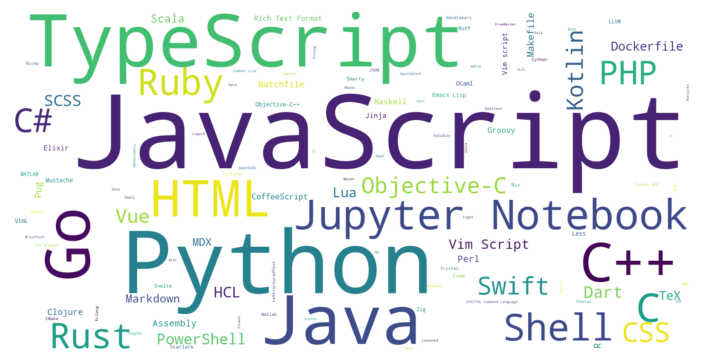

In [101]:
# Word cloud for the main repository languages
show_word_cloud_from_frequencies(df["language"].value_counts())

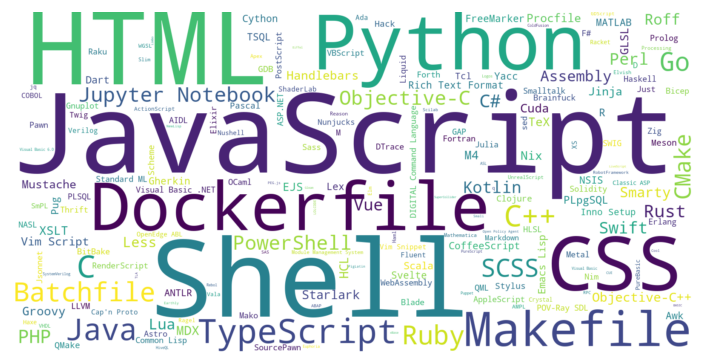

In [102]:
# Word cloud for languages by repositories
show_word_cloud_from_frequencies(languages["repositories"])

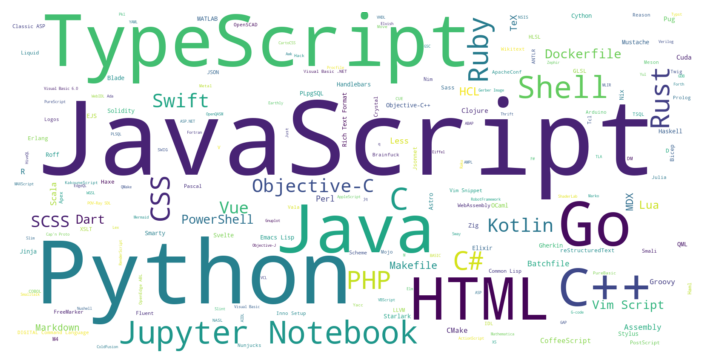

In [103]:
# Word cloud for languages by shares
show_word_cloud_from_frequencies(languages["shares"])

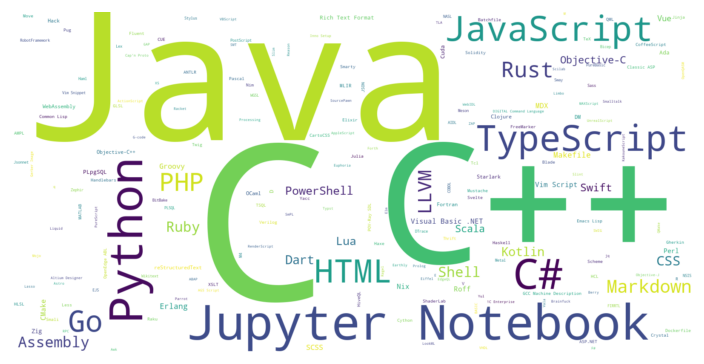

In [104]:
# Word cloud for languages by lines of code
show_word_cloud_from_frequencies(languages["lines"])

### Topics

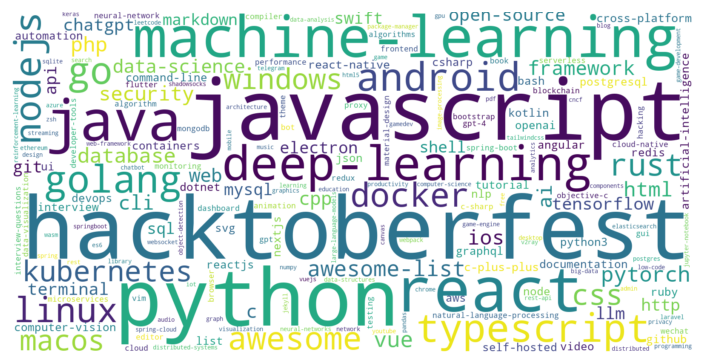

In [105]:
# Word cloud for all repository topics, including common languages
show_word_cloud_from_frequencies(df["topics"].explode().value_counts())

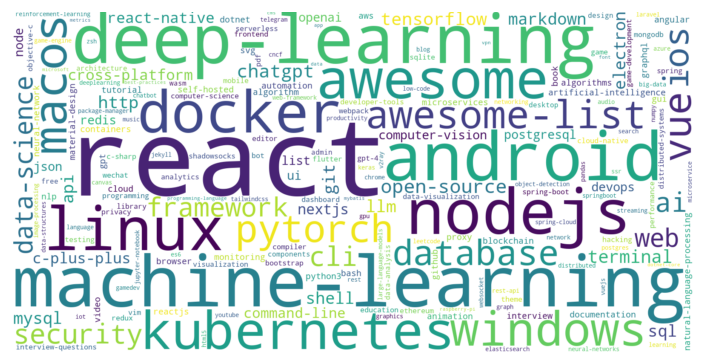

In [106]:
# Word cloud for all repository topics, excluding common languages
show_word_cloud_from_frequencies(remaining_topics)

### Default Branches

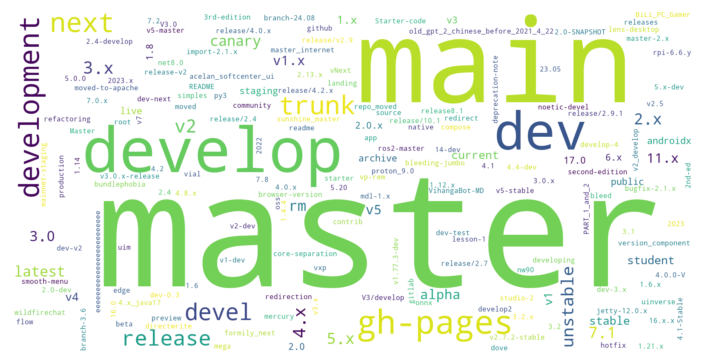

In [107]:
show_word_cloud_from_frequencies(df["default_branch"].value_counts())

### Owners

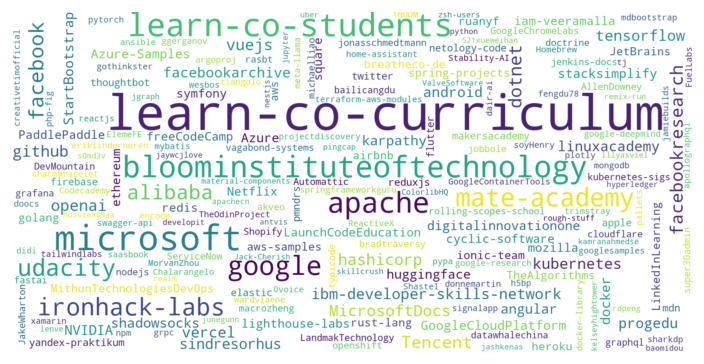

In [108]:
# Word cloud of exact repository owners
show_word_cloud_from_frequencies(df["owner"].value_counts())

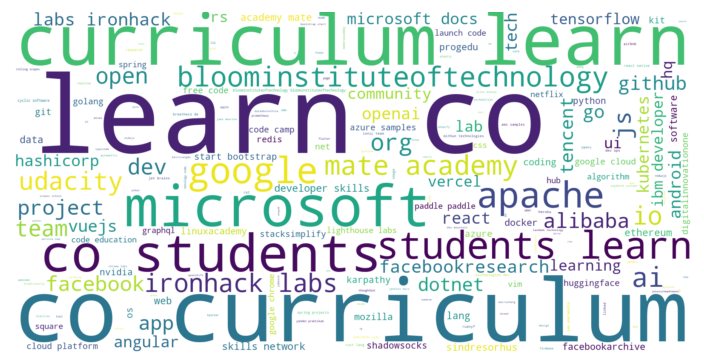

In [109]:
# Word cloud of words in repository owners
show_word_cloud_from_text(convert_to_words(" ".join(df["owner"])))

### Names

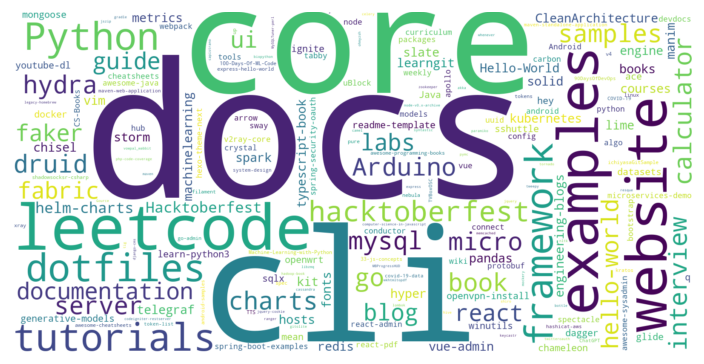

In [110]:
# Word cloud of exact repository names
show_word_cloud_from_frequencies(df["name"].value_counts())

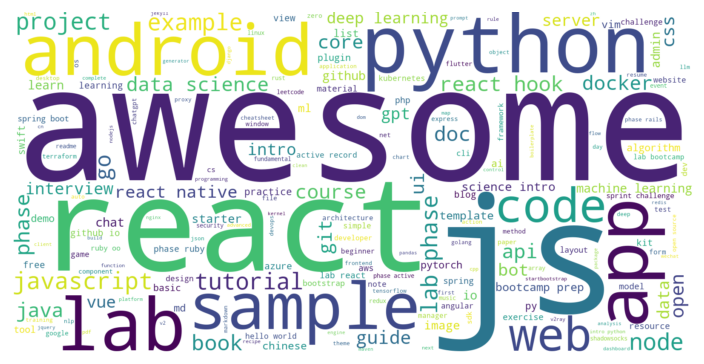

In [111]:
# Word cloud of words in repository names
show_word_cloud_from_text(convert_to_words(" ".join(df["name"])))

### Descriptions

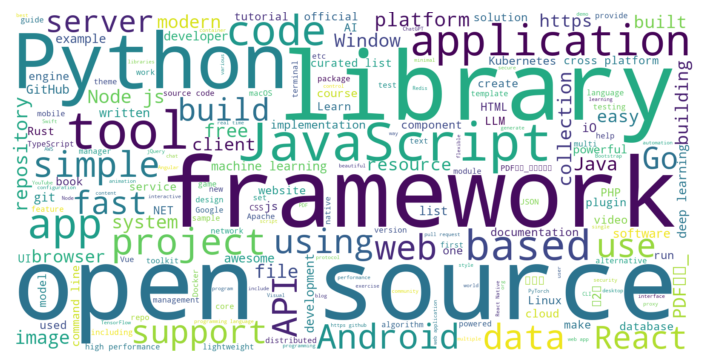

In [112]:
show_word_cloud_from_text(" ".join(df["description"].dropna()))